Please upload an audio file (supported formats: wav, mp3, m4a, flac)


Saving samp2 (online-audio-converter.com).wav to samp2 (online-audio-converter.com).wav

Loading audio file...


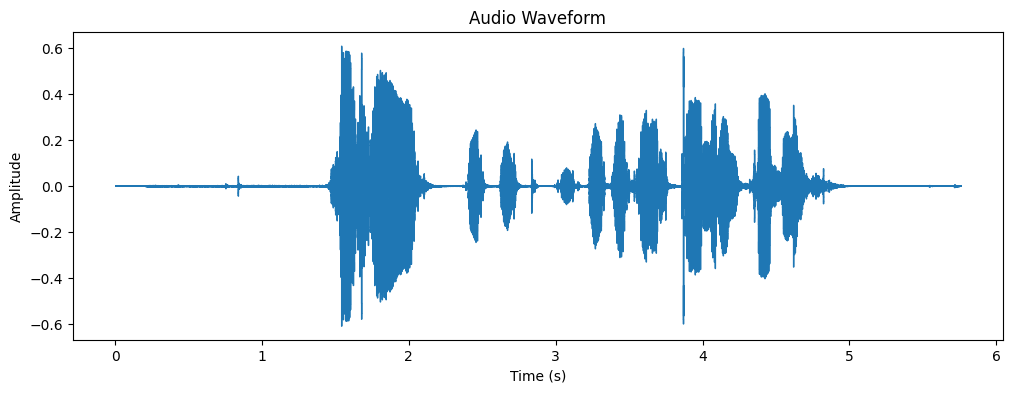


Audio Signal Analysis:
Filename: samp2 (online-audio-converter.com).wav
Duration: 5.76 seconds
Sample Rate: 16000 Hz
Number of Samples: 92137
Maximum Amplitude: 0.6081
RMS Energy: 0.0682
Signal Shape: (92137,)


In [1]:
from google.colab import files
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import warnings

def analyze_audio():
    """
    Upload and analyze an audio file, displaying its waveform and key information
    """
    try:
        # Upload file
        print("Please upload an audio file (supported formats: wav, mp3, m4a, flac)")
        uploaded = files.upload()

        if not uploaded:
            raise ValueError("No file was uploaded")

        # Get the uploaded file name
        file_name = list(uploaded.keys())[0]

        # Validate file extension
        valid_extensions = ['.wav', '.mp3', '.m4a', '.flac']
        if not any(file_name.lower().endswith(ext) for ext in valid_extensions):
            raise ValueError(f"Unsupported file format. Please use: {', '.join(valid_extensions)}")

        # Load the audio file with error handling
        print("\nLoading audio file...")
        audio, sr = librosa.load(file_name, sr=16000)  # Load at 16kHz sample rate

        # Check if audio is empty or invalid
        if len(audio) == 0:
            raise ValueError("The uploaded audio file is empty")

        # Create visualization
        plt.figure(figsize=(12, 4))
        librosa.display.waveshow(audio, sr=sr)
        plt.title("Audio Waveform")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.show()

        # Calculate and display audio statistics
        duration = librosa.get_duration(y=audio, sr=sr)
        max_amplitude = np.max(np.abs(audio))
        rms_energy = np.sqrt(np.mean(audio**2))

        print("\nAudio Signal Analysis:")
        print(f"Filename: {file_name}")
        print(f"Duration: {duration:.2f} seconds")
        print(f"Sample Rate: {sr} Hz")
        print(f"Number of Samples: {len(audio)}")
        print(f"Maximum Amplitude: {max_amplitude:.4f}")
        print(f"RMS Energy: {rms_energy:.4f}")
        print(f"Signal Shape: {audio.shape}")

        # Check for potential clipping
        if max_amplitude > 0.95:
            print("\nWarning: Audio signal shows signs of clipping")

        # Check for very low volume
        if rms_energy < 0.01:
            print("\nWarning: Audio signal has very low volume")

        return audio, sr

    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None

# Suppress warnings
warnings.filterwarnings('ignore')

# Run the analysis
audio, sr = analyze_audio()

In [ ]:
!pip install noisereduce

In [ ]:
import noisereduce as nr

# Reduce noise
reduced_noise_audio = nr.reduce_noise(y=audio, sr=sr, prop_decrease=0.8)

# Save the cleaned audio
import soundfile as sf
sf.write("cleaned_speech.wav", reduced_noise_audio, sr)

print("✅ Noise reduction completed, saved as cleaned_speech.wav")


✅ Noise reduction completed, saved as cleaned_speech.wav


In [ ]:
!pip install whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=32f972463eea4b1658feaac177f0eac519b74dfccef17ef210cc9996bfc6c3a1
  Stored in directory: /root/.cache/pip/wheels/21/65/ee/4e6672aabfa486d3341a39a04f8f87c77e5156149299b5a7d0
Successfully built whisper


In [ ]:
!pip install noisereduce librosa soundfile

In [ ]:
!pip install openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s

In [ ]:
!pip install gtts


In [ ]:
import whisper

# Load the Whisper model
model = whisper.load_model("base")

# Transcribe speech
result = model.transcribe("cleaned_speech.wav")

# Print the recognized text
print("Transcription:", result["text"])


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 173MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

Transcription:  I have a stammering problem.


In [ ]:
import re

def detect_stuttering(text):
    words = text.split()
    stuttered_words = [word for word in words if re.search(r"([a-zA-Z])\1{1,}", word)]
    return stuttered_words

stuttered_words = detect_stuttering(result["text"])
print("Detected Stuttered Words:", stuttered_words)


Detected Stuttered Words: ['stammering']


In [ ]:
from transformers import pipeline

# Load AI model for speech correction
corrector = pipeline("text2text-generation", model="facebook/bart-large")

def correct_stuttering(text):
    corrected_text = corrector(text, max_length=100)[0]['generated_text']
    return corrected_text

corrected_text = correct_stuttering(result["text"])
print("Corrected Speech:", corrected_text)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Corrected Speech: I'm sorry. I have a stammering problem.


In [ ]:
from gtts import gTTS
from IPython.display import Audio



# Choose different accents by changing 'lang'
tts = gTTS(corrected_text, lang='en', tld='co.in')  # British English

# Save and play
tts.save("enhanced_speech.mp3")
Audio("enhanced_speech.mp3", autoplay=True)
